In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:60000]
X_test = mnist.data[60000:]
N, D = X.shape
X = X.values if hasattr(X, 'values') else X
X_test = X_test.values if hasattr(X_test, 'values') else X_test

In [ ]:
# Centering the data by subtracting the mean
mean_X = np.mean(X, axis=0)
X_centered = X - mean_X
X_test_centered = X_test - mean_X

In [ ]:
# Step 2: Perform PCA using Eigenvalue Decomposition
cov_matrix = np.cov(X_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
# Function to project data to lower dimensions
def project_data(X_centered, eigenvectors, M):
    B = eigenvectors[:, :M]
    Z = X_centered.dot(B)
    return Z, B

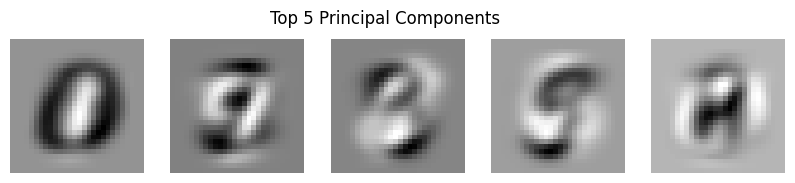

In [ ]:
# Step 1.1: Plot the top 5 principal components as images
M = 5
top_components = eigenvectors[:, :M]
plt.figure(figsize=(10, 2))
for i in range(M):
    plt.subplot(1, M, i + 1)
    plt.imshow(top_components[:, i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Top 5 Principal Components")
plt.show()

In [ ]:
# Step 1.2: Approximating a random image using the first 5 components
random_index = np.random.randint(0, N)
x_n = X_centered[random_index]
z_n = x_n.dot(top_components)
x_approx = top_components.dot(z_n)

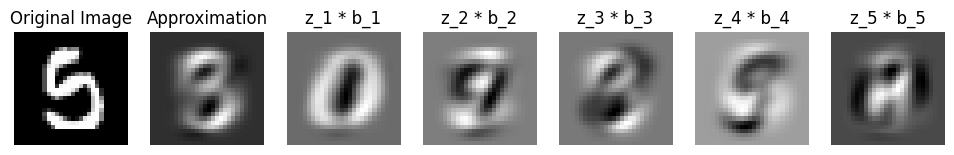

In [ ]:
# Plot original image, approximation, and each component's contribution
plt.figure(figsize=(12, 4))
plt.subplot(1, M + 2, 1)
plt.imshow((x_n + mean_X).reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, M + 2, 2)
plt.imshow((x_approx + mean_X).reshape(28, 28), cmap='gray')
plt.title("Approximation")
plt.axis('off')

for i in range(M):
    component_contribution = z_n[i] * top_components[:, i]
    plt.subplot(1, M + 2, i + 3)
    plt.imshow(component_contribution.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"z_{i+1} * b_{i+1}")
plt.show()

In [ ]:
# Compute reconstruction error for the selected image
reconstruction_error = np.linalg.norm(x_n - x_approx) ** 2
print(f"Reconstruction error for the selected image: {reconstruction_error}")

Reconstruction error for the selected image: 2355832.582429519


In [ ]:
# Compute mean reconstruction error over all training samples for M=5
total_reconstruction_error = np.mean([np.linalg.norm(x - top_components.dot(x.dot(top_components))) ** 2 for x in X_centered])
print(f"Mean reconstruction error for M=5: {total_reconstruction_error}")

Mean reconstruction error for M=5: 2289245.229308953


<Figure size 1500x1000 with 0 Axes>

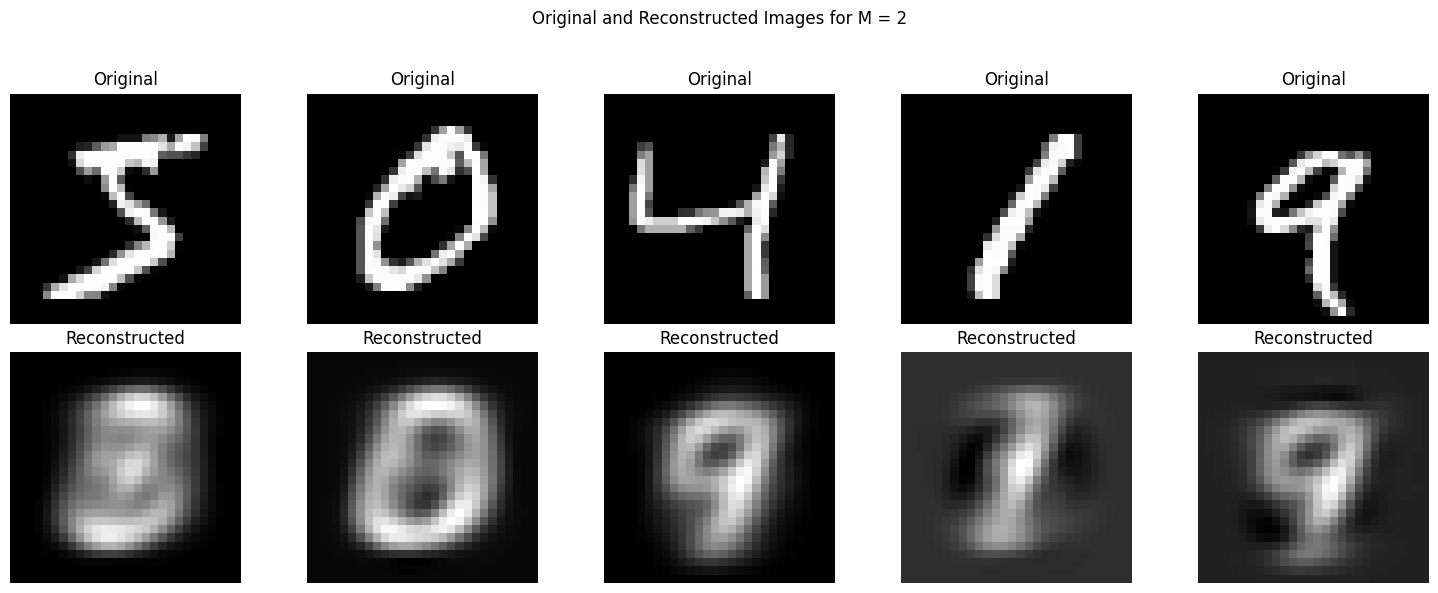

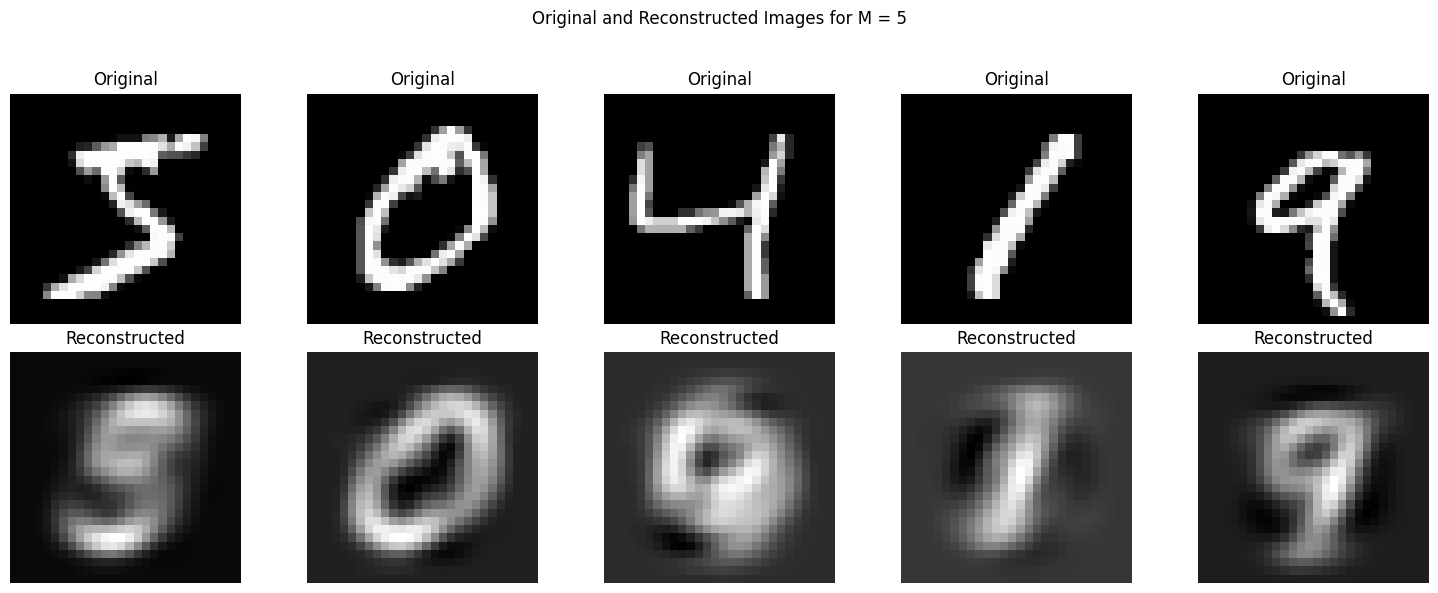

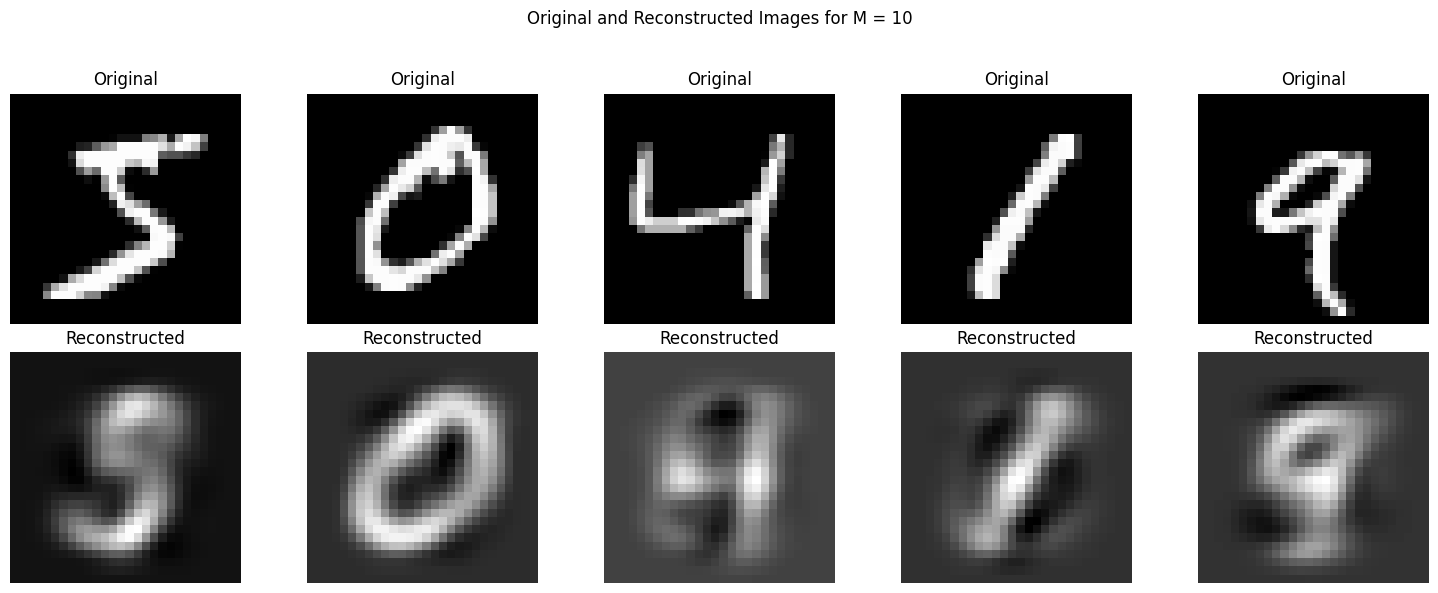

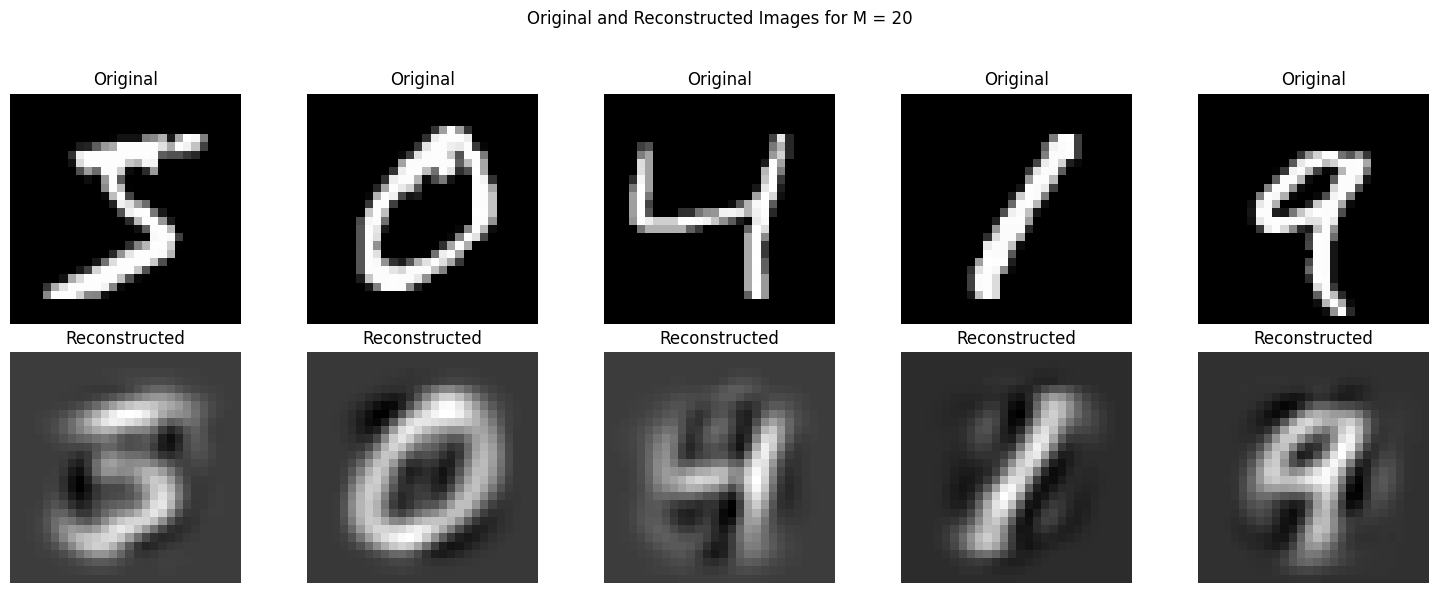

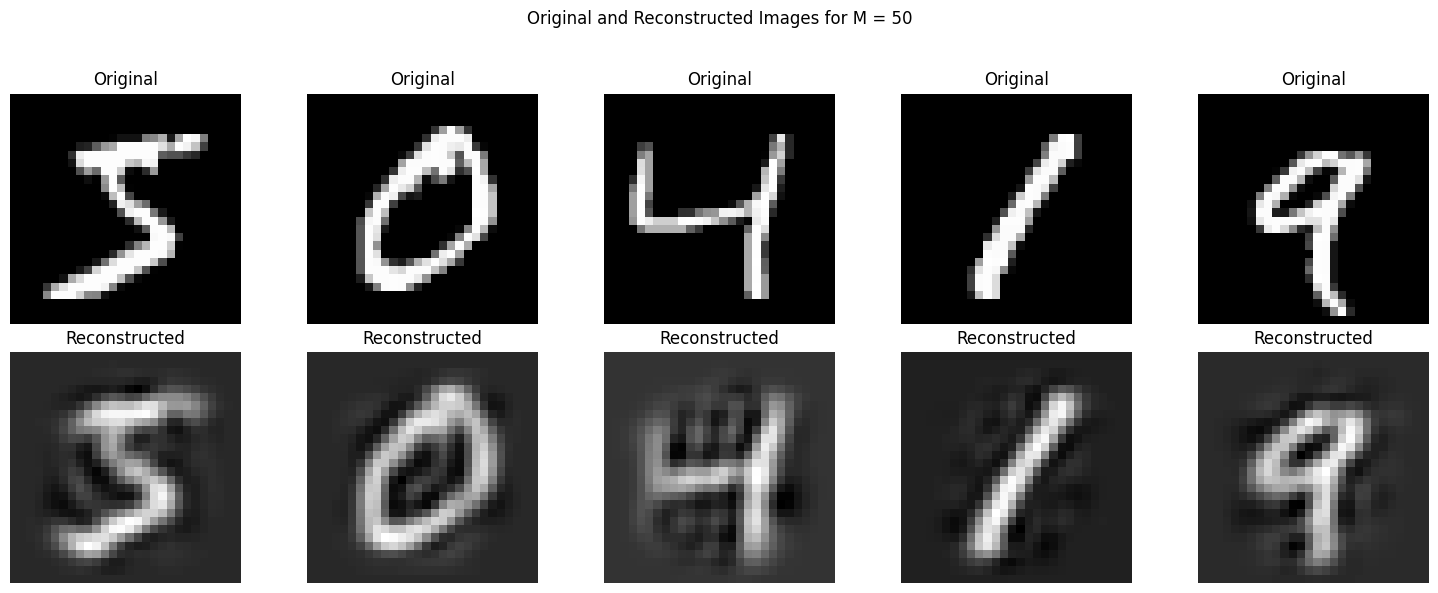

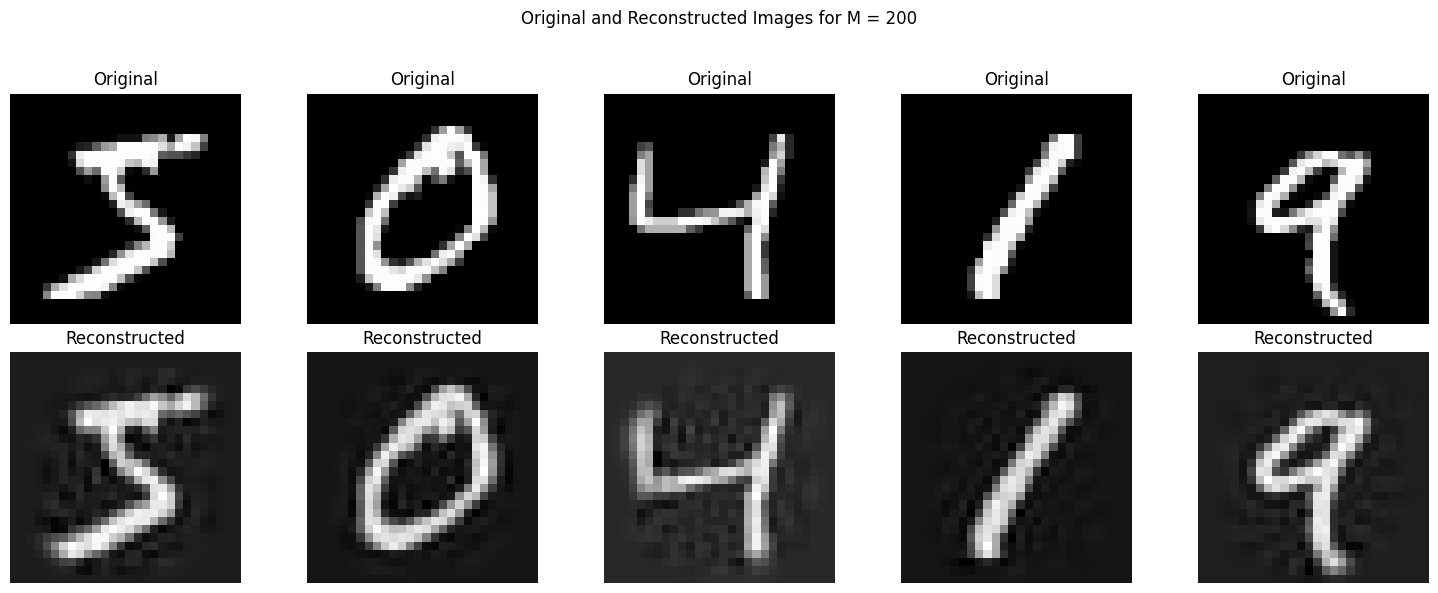

In [ ]:
# Step 1.3: Check reconstruction error with different numbers of components
M_values = [2, 5, 10, 20, 50, 200]
plt.figure(figsize=(15, 10))
mean_errors = []

for idx, M in enumerate(M_values):
    Z_train, B_train = project_data(X_centered, eigenvectors, M)
    X_approx_train = Z_train.dot(B_train.T)
    mean_error = np.mean(np.linalg.norm(X_centered - X_approx_train, axis=1) ** 2)
    mean_errors.append(mean_error)

    # Plot 5 original and reconstructed images for each M
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(f"Original and Reconstructed Images for M = {M}")

    for i in range(5):
        # Plot original image
        axes[0, i].imshow((X_centered[i] + mean_X).reshape(28, 28), cmap='gray')
        axes[0, i].set_title("Original")
        axes[0, i].axis('off')

        # Plot reconstructed image
        axes[1, i].imshow((X_approx_train[i] + mean_X).reshape(28, 28), cmap='gray')
        axes[1, i].set_title("Reconstructed")
        axes[1, i].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
    plt.show()


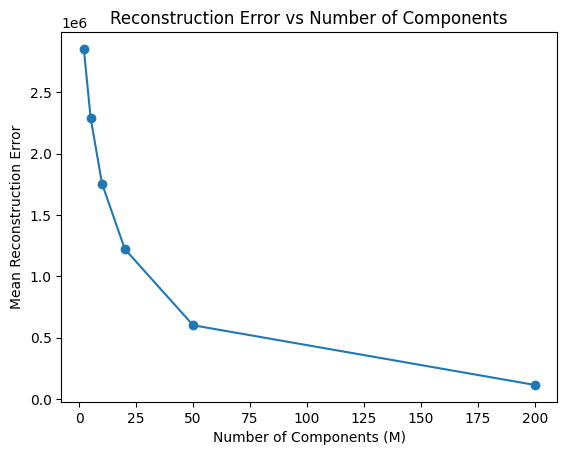

In [ ]:
# Plot mean reconstruction error
plt.figure()
plt.plot(M_values, mean_errors, marker='o')
plt.xlabel("Number of Components (M)")
plt.ylabel("Mean Reconstruction Error")
plt.title("Reconstruction Error vs Number of Components")
plt.show()

In [ ]:
# Step 1.4: Check reconstruction error on test dataset
mean_errors_test = []
for M in M_values:
    Z_test, _ = project_data(X_test_centered, eigenvectors, M)
    X_approx_test = Z_test.dot(eigenvectors[:, :M].T)
    mean_error_test = np.mean(np.linalg.norm(X_test_centered - X_approx_test, axis=1) ** 2)
    mean_errors_test.append(mean_error_test)

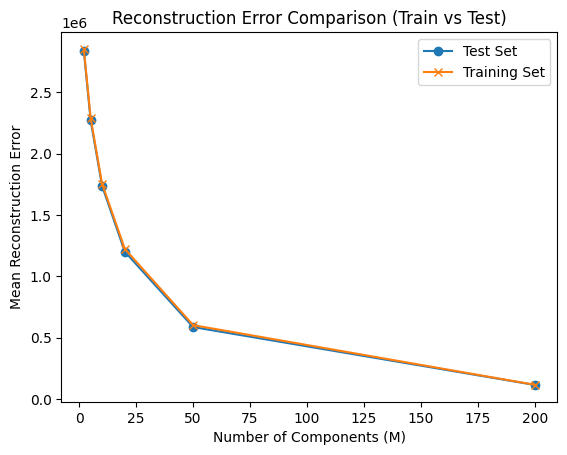

In [ ]:
# Plot mean reconstruction error for test set
plt.figure()
plt.plot(M_values, mean_errors_test, marker='o', label="Test Set")
plt.plot(M_values, mean_errors, marker='x', label="Training Set")
plt.xlabel("Number of Components (M)")
plt.ylabel("Mean Reconstruction Error")
plt.title("Reconstruction Error Comparison (Train vs Test)")
plt.legend()
plt.show()

In [ ]:
# Step 1.5: 2D visualization for digits 0, 1, and 9
selected_digits = [0, 1, 9]
indices = [np.where(mnist.target[:60000] == str(digit))[0][:100] for digit in selected_digits]
selected_indices = np.concatenate(indices)
X_selected = X_centered[selected_indices]
Z_2D, _ = project_data(X_selected, eigenvectors, 2)

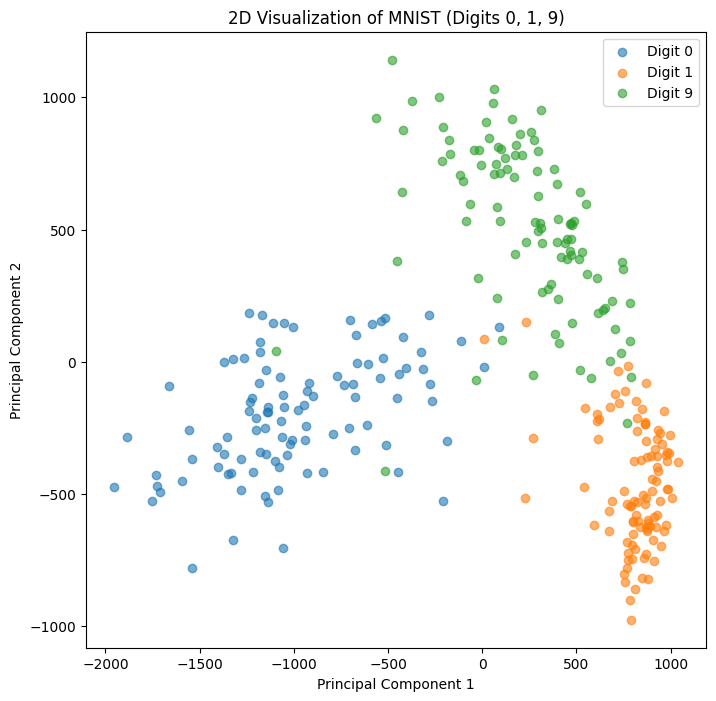

In [ ]:
# Plot 2D visualization
plt.figure(figsize=(8, 8))
for i, digit in enumerate(selected_digits):
    plt.scatter(Z_2D[i*100:(i+1)*100, 0], Z_2D[i*100:(i+1)*100, 1], label=f"Digit {digit}", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D Visualization of MNIST (Digits 0, 1, 9)")
plt.legend()
plt.show()